In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#!pip install tensorflow==2.5.0

In [4]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [7]:
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [8]:
train_data, test_data = imdb['train'], imdb['test']

In [9]:
tokenizer = info.features['text'].encoder

In [10]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [11]:
sample_string = 'nothing ends adrian, nothing ever ends'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized String is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

Tokenized String is [247, 1084, 1077, 5878, 2, 247, 160, 272, 8044]
The original string: nothing ends adrian, nothing ever ends


In [12]:
for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

247 ----> nothing 
1084 ----> ends 
1077 ----> ad
5878 ----> rian
2 ----> , 
247 ----> nothing 
160 ----> ever 
272 ----> end
8044 ----> s


In [14]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [16]:
embedding_dim = 64

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 10

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(train_dataset, epochs = num_epochs, validation_data = test_dataset)

Epoch 1/10


2021-09-07 10:33:31.556652: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-07 10:33:31.582177: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1999965000 Hz


 28/391 [=>............................] - ETA: 12s - loss: 0.6933 - accuracy: 0.5017

2021-09-07 10:33:33.057894: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64618496 exceeds 10% of free system memory.
2021-09-07 10:33:33.093713: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64618496 exceeds 10% of free system memory.


391/391 [==============================] - 16s 39ms/step - loss: 0.6867 - accuracy: 0.5749 - val_loss: 0.6680 - val_accuracy: 0.6277
Epoch 2/10
154/391 [==========>...................] - ETA: 7s - loss: 0.6414 - accuracy: 0.7303

2021-09-07 10:33:52.100428: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64618496 exceeds 10% of free system memory.
2021-09-07 10:33:52.127714: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64618496 exceeds 10% of free system memory.


391/391 [==============================] - 15s 37ms/step - loss: 0.5903 - accuracy: 0.7621 - val_loss: 0.5162 - val_accuracy: 0.8051
Epoch 3/10
315/391 [=======================>......] - ETA: 2s - loss: 0.4467 - accuracy: 0.8424

2021-09-07 10:34:11.066312: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 64618496 exceeds 10% of free system memory.


391/391 [==============================] - 14s 35ms/step - loss: 0.4357 - accuracy: 0.8474 - val_loss: 0.4096 - val_accuracy: 0.8458
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.3447 - accuracy: 0.8786 - val_loss: 0.3554 - val_accuracy: 0.8667
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 0.2962 - accuracy: 0.8945 - val_loss: 0.3323 - val_accuracy: 0.8713
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2650 - accuracy: 0.9051 - val_loss: 0.3281 - val_accuracy: 0.8709
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2405 - accuracy: 0.9136 - val_loss: 0.3129 - val_accuracy: 0.8768
Epoch 8/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2240 - accuracy: 0.9201 - val_loss: 0.3061 - val_accuracy: 0.8816
Epoch 9/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2099 - accuracy: 0.9253 - val_loss: 0.3053 - val_accuracy: 0.8830
Epo

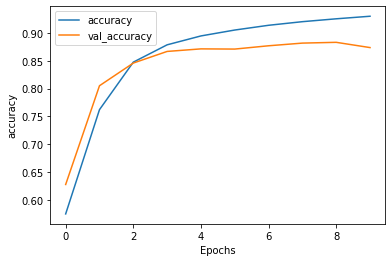

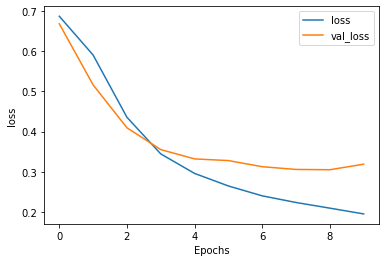

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(8185, 64)


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()